In [61]:
!pip install scikit-posthocs

     |████████████████████████████████| 10.8 MB 878 kB/s eta 0:00:01
     |████████████████████████████████| 233 kB 808 kB/s eta 0:00:01


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import scoreatpercentile, bootstrap
import scikit_posthocs as sp
col1 = "tab:blue"
col2 = "tab:orange"

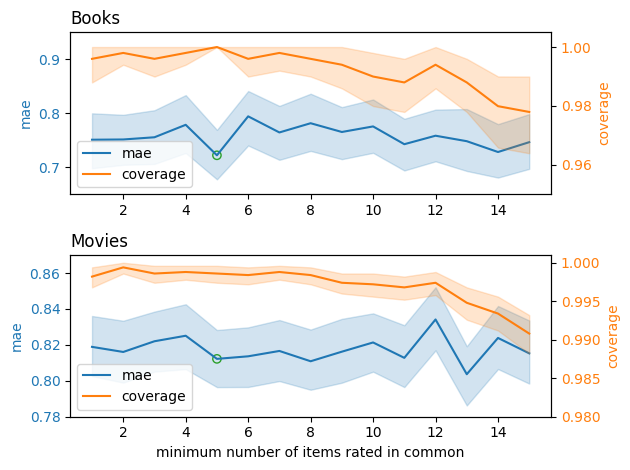

In [59]:
movie_metrics_minimum_number_of_items_rated_in_common = pd.concat([pd.read_csv(f"results/movie_cf_results_minimum_number_of_items_rated_in_common_{i}.csv") for i in range(1, 16)], axis=0).reset_index()
book_metrics_minimum_number_of_items_rated_in_common = pd.concat([pd.read_csv(f"results/book_cf_results_minimum_number_of_items_rated_in_common_{i}.csv") for i in range(1, 16)], axis=0).reset_index()

fig, axs = plt.subplots(2, 1)
# Books
ax11 = axs[0]
ax12 = ax11.twinx()
sns.lineplot(data=book_metrics_minimum_number_of_items_rated_in_common , 
             x="minimum_number_of_items_rated_in_common", y="mae", 
             ax=ax11, color=col1,
             # estimator=np.median
            )
sns.lineplot(data=book_metrics_minimum_number_of_items_rated_in_common , 
             x="minimum_number_of_items_rated_in_common", y="coverage", 
             ax=ax12, color=col2,
             # estimator=np.median
            )
ax11.set_ylim((0.65, 0.95))
ax12.set_ylim((0.95, 1.005))
ax12.legend(handles=[a.lines[0] for a in [ax11, ax12]], labels=["mae", "coverage"])
ax11.set_xlabel("")

# Movies
ax21 = axs[1]
ax22 = ax21.twinx()
sns.lineplot(data=movie_metrics_minimum_number_of_items_rated_in_common, 
             x="minimum_number_of_items_rated_in_common", y="mae", 
             ax=ax21, color=col1,
             # estimator=np.median
            )
sns.lineplot(data=movie_metrics_minimum_number_of_items_rated_in_common, 
             x="minimum_number_of_items_rated_in_common", y="coverage", 
             ax=ax22, color=col2,
             # estimator=np.median
            )
ax21.set_xlabel("minimum number of items rated in common")
ax21.set_ylim((0.78, 0.87))
ax22.set_ylim((0.98, 1.001))
ax22.legend(handles=[a.lines[0] for a in [ax21, ax22]], labels=["mae", "coverage"])

ax11.set_title('Books', loc='left')
ax22.set_title('Movies', loc='left')
ax21.tick_params(axis='y', labelcolor=col1)
ax22.tick_params(axis='y', labelcolor=col2)
ax21.set_ylabel('mae', color=col1)
ax22.set_ylabel('coverage', color=col2)
ax11.tick_params(axis='y', labelcolor=col1)
ax12.tick_params(axis='y', labelcolor=col2)
ax11.set_ylabel('mae', color=col1)
ax12.set_ylabel('coverage', color=col2)
ax21.scatter([5], [movie_metrics_minimum_number_of_items_rated_in_common[movie_metrics_minimum_number_of_items_rated_in_common["minimum_number_of_items_rated_in_common"]==5]["mae"].mean()],
          color="tab:green", facecolors='none')
ax11.scatter([5], [book_metrics_minimum_number_of_items_rated_in_common[book_metrics_minimum_number_of_items_rated_in_common["minimum_number_of_items_rated_in_common"]==5]["mae"].mean()],
          color="tab:green", facecolors='none')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig("results/minimum_number_of_items_plot.png", dpi=400)

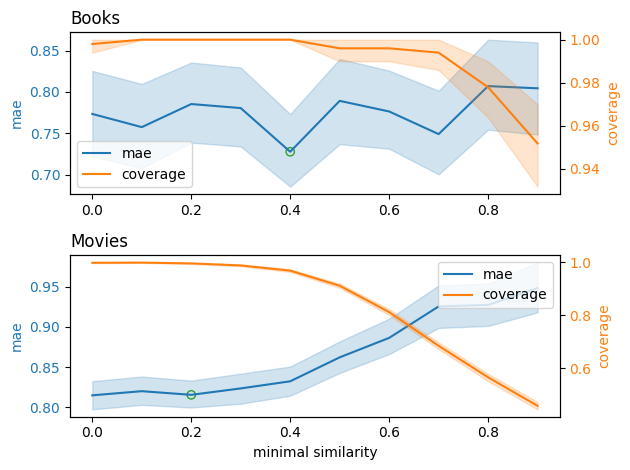

In [34]:
book_minimal_similarity = pd.concat([pd.read_csv(f"results/book_cf_results_minimal_similarity_{i}.csv") for i in range(10)], axis=0).reset_index()
movie_minimal_similarity = pd.concat([pd.read_csv(f"results/movie_cf_results_minimal_similarity_{i}.csv") for i in range(10)], axis=0).reset_index()
# movie_metrics_minimum_number_of_items_rated_in_common = pd.concat([pd.read_csv(f"results/movie_cf_results_minimum_number_of_items_rated_in_common_{i}.csv") for i in range(1, 16)], axis=0).reset_index()
# book_metrics_minimum_number_of_items_rated_in_common = pd.concat([pd.read_csv(f"results/book_cf_results_minimum_number_of_items_rated_in_common_{i}.csv") for i in range(1, 16)], axis=0).reset_index()

fig, axs = plt.subplots(2, 1)
# Books
ax11 = axs[0]
ax12 = ax11.twinx()
sns.lineplot(data=book_minimal_similarity , 
             x="minimal_similarity", y="mae", 
             ax=ax11, color=col1,
             # estimator=np.median
            )
sns.lineplot(data=book_minimal_similarity , 
             x="minimal_similarity", y="coverage", 
             ax=ax12, color=col2,
             # estimator=np.median
            )
# ax11.set_ylim((0.65, 0.95))
# ax12.set_ylim((0.95, 1.005))
ax12.legend(handles=[a.lines[0] for a in [ax11, ax12]], labels=["mae", "coverage"])
ax11.set_xlabel("")

# Movies
ax21 = axs[1]
ax22 = ax21.twinx()
sns.lineplot(data=movie_minimal_similarity, 
             x="minimal_similarity", y="mae", 
             ax=ax21, color=col1,
             # estimator=np.median
            )
sns.lineplot(data=movie_minimal_similarity, 
             x="minimal_similarity", y="coverage", 
             ax=ax22, color=col2,
             # estimator=np.median
            )
ax21.set_xlabel("minimal similarity")
# ax21.set_ylim((0.78, 0.87))
# ax22.set_ylim((0.98, 1.001))
ax22.legend(handles=[a.lines[0] for a in [ax21, ax22]], labels=["mae", "coverage"])

ax11.set_title('Books', loc='left')
ax22.set_title('Movies', loc='left')
ax21.tick_params(axis='y', labelcolor=col1)
ax22.tick_params(axis='y', labelcolor=col2)
ax21.set_ylabel('mae', color=col1)
ax22.set_ylabel('coverage', color=col2)
ax11.tick_params(axis='y', labelcolor=col1)
ax12.tick_params(axis='y', labelcolor=col2)
ax11.set_ylabel('mae', color=col1)
ax12.set_ylabel('coverage', color=col2)
ax21.scatter([0.2], [movie_minimal_similarity[movie_minimal_similarity["minimal_similarity"]==0.2]["mae"].mean()],
          color="tab:green", facecolors='none')
ax11.scatter([0.4], [book_minimal_similarity[book_minimal_similarity["minimal_similarity"]==0.4]["mae"].mean()],
          color="tab:green", facecolors='none')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig("results/minimal_similarity.png", dpi=400)

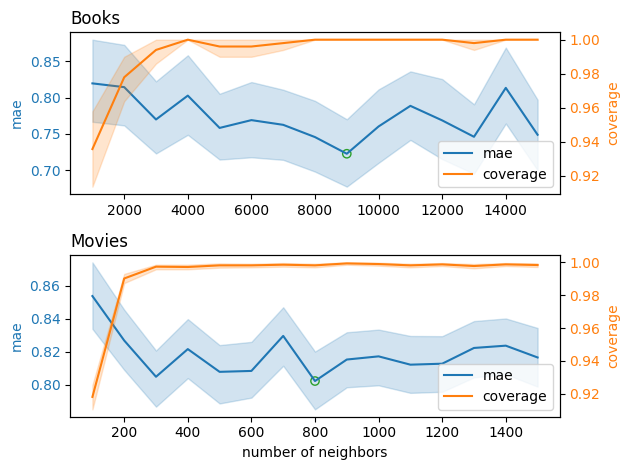

In [35]:
book_number_of_neighbors = pd.concat([pd.read_csv(f"results/book_cf_results_number_of_neighbors_{i}.csv") for i in range(15)], axis=0).reset_index()
movie_number_of_neighbors = pd.concat([pd.read_csv(f"results/movie_cf_results_number_of_neighbors_{i}.csv") for i in range(15)], axis=0).reset_index()

fig, axs = plt.subplots(2, 1)
# Books
ax11 = axs[0]
ax12 = ax11.twinx()
sns.lineplot(data=book_number_of_neighbors , 
             x="number_of_neighbors", y="mae", 
             ax=ax11, color=col1,
             # estimator=np.median
            )
sns.lineplot(data=book_number_of_neighbors , 
             x="number_of_neighbors", y="coverage", 
             ax=ax12, color=col2,
             # estimator=np.median
            )
# ax11.set_ylim((0.65, 0.95))
# ax12.set_ylim((0.95, 1.005))
ax12.legend(handles=[a.lines[0] for a in [ax11, ax12]], labels=["mae", "coverage"])
ax11.set_xlabel("")

# Movies
ax21 = axs[1]
ax22 = ax21.twinx()
sns.lineplot(data=movie_number_of_neighbors, 
             x="number_of_neighbors", y="mae", 
             ax=ax21, color=col1,
             # estimator=np.median
            )
sns.lineplot(data=movie_number_of_neighbors, 
             x="number_of_neighbors", y="coverage", 
             ax=ax22, color=col2,
             # estimator=np.median
            )
ax21.set_xlabel("number of neighbors")
# ax21.set_ylim((0.78, 0.87))
# ax22.set_ylim((0.98, 1.001))
ax22.legend(handles=[a.lines[0] for a in [ax21, ax22]], labels=["mae", "coverage"])

ax11.set_title('Books', loc='left')
ax22.set_title('Movies', loc='left')
ax21.tick_params(axis='y', labelcolor=col1)
ax22.tick_params(axis='y', labelcolor=col2)
ax21.set_ylabel('mae', color=col1)
ax22.set_ylabel('coverage', color=col2)
ax11.tick_params(axis='y', labelcolor=col1)
ax12.tick_params(axis='y', labelcolor=col2)
ax11.set_ylabel('mae', color=col1)
ax12.set_ylabel('coverage', color=col2)
ax21.scatter([800], [movie_number_of_neighbors[movie_number_of_neighbors["number_of_neighbors"]==800]["mae"].mean()],
          color="tab:green", facecolors='none')
ax11.scatter([9000], [book_number_of_neighbors[book_number_of_neighbors["number_of_neighbors"]==9000]["mae"].mean()],
          color="tab:green", facecolors='none')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig("results/number_of_neighbors.png", dpi=400)

In [54]:
movie_metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
movie_metrics_spearman = pd.read_csv("results/movie_cf_results_spearman.csv")

In [64]:
# ci = sns.utils.ci(movie_metrics_baseline["mae"].values)
ci_baseline = sns.utils.ci(sns.algorithms.bootstrap(movie_metrics_baseline["mae"].values))
ci_spearman = sns.utils.ci(sns.algorithms.bootstrap(movie_metrics_spearman["mae"].values))

In [68]:
movie_metrics_baseline["mae"].mean()

0.828633405154201

In [66]:
ci_baseline

array([0.81130287, 0.84602479])

In [69]:
movie_metrics_spearman["mae"].mean()

0.8282808365548391

In [70]:
ci_spearman

array([0.81076172, 0.84561358])

In [73]:
book_metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
book_metrics_spearman = pd.read_csv("results/book_cf_results_spearman.csv")
ci_baseline = sns.utils.ci(sns.algorithms.bootstrap(book_metrics_baseline["mae"].values))
ci_spearman = sns.utils.ci(sns.algorithms.bootstrap(book_metrics_spearman["mae"].values))
book_metrics_baseline["mae"].mean()

0.7445991685220386

In [74]:
ci_baseline

array([0.6930231 , 0.79699693])

In [75]:
book_metrics_spearman["mae"].mean()

0.7344301498829477

In [76]:
ci_spearman

array([0.68705883, 0.783768  ])

In [77]:
book_metrics_mean_adjusted = pd.read_csv("results/book_cf_results_mean_adjusted.csv")
book_metrics_mean_adjusted["mae"].mean()

0.6700105804317921

In [79]:
ci_mean_adjusted = sns.utils.ci(sns.algorithms.bootstrap(book_metrics_mean_adjusted["mae"].values))
ci_mean_adjusted

array([0.6226873 , 0.71990225])

In [80]:
movie_metrics_mean_adjusted = pd.read_csv("results/movie_cf_results_mean_adjusted.csv")
movie_metrics_mean_adjusted["mae"].mean()

0.7458267811496219

In [81]:
ci_mean_adjusted = sns.utils.ci(sns.algorithms.bootstrap(movie_metrics_mean_adjusted["mae"].values))
ci_mean_adjusted

array([0.72988963, 0.76218331])

In [4]:
movie_metrics_minimum_number_of_items_rated_in_common = pd.read_csv(f"results/movie_cf_results_minimum_number_of_items_rated_in_common_5.csv")
book_metrics_minimum_number_of_items_rated_in_common = pd.read_csv(f"results/book_cf_results_minimum_number_of_items_rated_in_common_5.csv")
book_metrics_minimum_number_of_items_rated_in_common["mae"].mean()

0.7218193289335574

In [5]:
ci_book_metrics_minimum_number_of_items_rated_in_common = sns.utils.ci(sns.algorithms.bootstrap(book_metrics_minimum_number_of_items_rated_in_common["mae"].values))
ci_book_metrics_minimum_number_of_items_rated_in_common

array([0.67688519, 0.76705041])

In [6]:
movie_metrics_minimum_number_of_items_rated_in_common["mae"].mean()

0.8122081273863284

In [7]:
ci_movie_metrics_minimum_number_of_items_rated_in_common = sns.utils.ci(sns.algorithms.bootstrap(movie_metrics_minimum_number_of_items_rated_in_common["mae"].values))
ci_movie_metrics_minimum_number_of_items_rated_in_common

array([0.79558109, 0.82948081])

In [9]:
book_minimal_similarity = pd.concat([pd.read_csv(f"results/book_cf_results_minimal_similarity_{i}.csv") for i in range(10)], axis=0).reset_index()
movie_minimal_similarity = pd.concat([pd.read_csv(f"results/movie_cf_results_minimal_similarity_{i}.csv") for i in range(10)], axis=0).reset_index()
book_minimal_similarity = book_minimal_similarity[book_minimal_similarity["minimal_similarity"]==0.4]
movie_minimal_similarity = movie_minimal_similarity[movie_minimal_similarity["minimal_similarity"]==0.2]
book_minimal_similarity["mae"].mean()

0.7276212865659951

In [10]:
ci_book_minimal_similarity = sns.utils.ci(sns.algorithms.bootstrap(book_minimal_similarity["mae"].values))
ci_book_minimal_similarity

array([0.68285191, 0.77169794])

In [11]:
movie_minimal_similarity["mae"].mean()

0.8155940089288707

In [12]:
ci_movie_minimal_similarity = sns.utils.ci(sns.algorithms.bootstrap(movie_minimal_similarity["mae"].values))
ci_movie_minimal_similarity

array([0.79880316, 0.83265009])

In [13]:
book_number_of_neighbors = pd.concat([pd.read_csv(f"results/book_cf_results_number_of_neighbors_{i}.csv") for i in range(15)], axis=0).reset_index()
movie_number_of_neighbors = pd.concat([pd.read_csv(f"results/movie_cf_results_number_of_neighbors_{i}.csv") for i in range(15)], axis=0).reset_index()
book_number_of_neighbors = book_number_of_neighbors[book_number_of_neighbors["number_of_neighbors"]==9000]
movie_number_of_neighbors = movie_number_of_neighbors[movie_number_of_neighbors["number_of_neighbors"]==800]
book_number_of_neighbors["mae"].mean()

0.7226714795601594

In [14]:
ci_book_number_of_neighbors = sns.utils.ci(sns.algorithms.bootstrap(book_number_of_neighbors["mae"].values))
ci_book_number_of_neighbors

array([0.67506121, 0.77086397])

In [15]:
movie_number_of_neighbors["mae"].mean()

0.8022621096324069

In [16]:
ci_movie_number_of_neighbors = sns.utils.ci(sns.algorithms.bootstrap(movie_number_of_neighbors["mae"].values))
ci_movie_number_of_neighbors

array([0.78481976, 0.81928407])

In [17]:
import scipy.stats as ss

In [40]:
movie_metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
movie_metrics_spearman = pd.read_csv("results/movie_cf_results_spearman.csv")
movie_metrics_baseline = movie_metrics_baseline[~movie_metrics_baseline["mae"].isna()]
movie_metrics_spearman = movie_metrics_spearman[~movie_metrics_spearman["mae"].isna()]
movie_metrics_baseline = movie_metrics_baseline.iloc[:len(movie_metrics_spearman)]
data = np.stack([movie_metrics_baseline["mae"].values, movie_metrics_spearman["mae"].values])
data.shape

(2, 4989)

In [41]:
ss.ttest_ind(movie_metrics_baseline["mae"].values, movie_metrics_spearman["mae"].values)

TtestResult(statistic=0.01795653612307992, pvalue=0.9856738860601284, df=9976.0)

In [44]:
movie_metrics_mean_adjusted = pd.read_csv("results/movie_cf_results_mean_adjusted.csv")
movie_metrics_mean_adjusted = movie_metrics_mean_adjusted[~movie_metrics_mean_adjusted["mae"].isna()]
movie_metrics_mean_adjusted = movie_metrics_mean_adjusted.iloc[:len(movie_metrics_spearman)]

In [45]:
ss.ttest_ind(movie_metrics_baseline["mae"].values, movie_metrics_mean_adjusted["mae"].values)

TtestResult(statistic=6.790770309532028, pvalue=1.1789135897024656e-11, df=9976.0)

In [46]:
ss.friedmanchisquare(*[maes for maes in zip(movie_metrics_baseline["mae"].values, movie_metrics_spearman["mae"].values)])

FriedmanchisquareResult(statistic=4944.4852304156875, pvalue=0.6664984145407704)

In [47]:
ss.friedmanchisquare(*[maes for maes in zip(movie_metrics_baseline["mae"].values, movie_metrics_mean_adjusted["mae"].values)])

FriedmanchisquareResult(statistic=5144.24259690851, pvalue=0.05998249216333758)

In [93]:
metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_baseline["cv_fold"] = metrics_baseline.index
metrics_baseline["estimator"] = "baseline"
metrics_mean_adjusted = pd.read_csv("results/movie_cf_results_mean_adjusted.csv")
metrics_mean_adjusted["cv_fold"] = metrics_mean_adjusted.index
metrics_mean_adjusted["estimator"] = "mean-adjusted"
metrics_spearman = pd.read_csv("results/movie_cf_results_spearman.csv")
metrics_spearman["cv_fold"] = metrics_spearman.index
metrics_spearman["estimator"] = "Spearman"
minimum_number_of_items_rated_in_common = \
    pd.read_csv(f"results/movie_cf_results_minimum_number_of_items_rated_in_common_5.csv")
minimum_number_of_items_rated_in_common["cv_fold"] = minimum_number_of_items_rated_in_common.index
minimum_number_of_items_rated_in_common["estimator"] = "min. num. rated in common"
metrics_minimal_similarity = pd.read_csv(f"results/movie_cf_results_minimal_similarity_2.csv")
metrics_minimal_similarity["cv_fold"] = metrics_minimal_similarity.index
metrics_minimal_similarity["estimator"] = "minimal similarity"
number_of_neighbors = pd.read_csv(f"results/movie_cf_results_number_of_neighbors_7.csv")
number_of_neighbors["cv_fold"] = number_of_neighbors.index
number_of_neighbors["estimator"] = "number of neighbors"

# data=pd.concat([metrics_baseline, metrics_mean_adjusted, metrics_spearman, minimum_number_of_items_rated_in_common, metrics_minimal_similarity, number_of_neighbors], axis=0)
movie_data=pd.concat([metrics_baseline, metrics_mean_adjusted, metrics_spearman, minimum_number_of_items_rated_in_common, metrics_minimal_similarity, number_of_neighbors], axis=0)
movie_data["score"] = -movie_data["mae"]
movie_data.head()

,Unnamed: 0,coverage,mae,neighborhood_method,correlation_method,minimal_similarity,number_of_neighbors,minimum_number_of_items_rated_in_common,minimal_number_of_ratings,deviation_from_mean,cv_fold,estimator,score
0,0,1.0,0.162049,NaN,pearson,-1.0,0,1.0,1,False,0,baseline,-0.162049
1,1,1.0,0.655694,NaN,pearson,-1.0,0,1.0,1,False,1,baseline,-0.655694
2,2,1.0,1.049274,NaN,pearson,-1.0,0,1.0,1,False,2,baseline,-1.049274
3,3,1.0,1.103050,NaN,pearson,-1.0,0,1.0,1,False,3,baseline,-1.103050
4,4,1.0,0.090625,NaN,pearson,-1.0,0,1.0,1,False,4,baseline,-0.090625


In [94]:
metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
metrics_baseline["cv_fold"] = metrics_baseline.index
metrics_baseline["estimator"] = "baseline"
metrics_mean_adjusted = pd.read_csv("results/book_cf_results_mean_adjusted.csv")
metrics_mean_adjusted["cv_fold"] = metrics_mean_adjusted.index
metrics_mean_adjusted["estimator"] = "mean-adjusted"
metrics_spearman = pd.read_csv("results/book_cf_results_spearman.csv")
metrics_spearman["cv_fold"] = metrics_spearman.index
metrics_spearman["estimator"] = "Spearman"
minimum_number_of_items_rated_in_common = \
    pd.read_csv(f"results/book_cf_results_minimum_number_of_items_rated_in_common_5.csv")
minimum_number_of_items_rated_in_common["cv_fold"] = minimum_number_of_items_rated_in_common.index
minimum_number_of_items_rated_in_common["estimator"] = "min. num. rated in common"
metrics_minimal_similarity = pd.read_csv(f"results/book_cf_results_minimal_similarity_4.csv")
metrics_minimal_similarity["cv_fold"] = metrics_minimal_similarity.index
metrics_minimal_similarity["estimator"] = "minimal similarity"
number_of_neighbors = pd.read_csv(f"results/book_cf_results_number_of_neighbors_8.csv")
number_of_neighbors["cv_fold"] = number_of_neighbors.index
number_of_neighbors["estimator"] = "number of neighbors"

book_data = pd.concat([metrics_baseline, metrics_mean_adjusted, metrics_spearman, minimum_number_of_items_rated_in_common, metrics_minimal_similarity, number_of_neighbors], axis=0)
book_data["score"] = - book_data["mae"]
book_data.head()

,Unnamed: 0,coverage,mae,neighborhood_method,correlation_method,minimal_similarity,number_of_neighbors,minimum_number_of_items_rated_in_common,minimal_number_of_ratings,deviation_from_mean,cv_fold,estimator,score
0,0,1.0,0.364637,NaN,pearson,-1.0,0,1.0,1,False,0,baseline,-0.364637
1,1,1.0,0.688051,NaN,pearson,-1.0,0,1.0,1,False,1,baseline,-0.688051
2,2,1.0,1.039577,NaN,pearson,-1.0,0,1.0,1,False,2,baseline,-1.039577
3,3,1.0,0.906946,NaN,pearson,-1.0,0,1.0,1,False,3,baseline,-0.906946
4,4,1.0,0.128336,NaN,pearson,-1.0,0,1.0,1,False,4,baseline,-0.128336


In [95]:
movie_data["cv_fold"] += len(book_data)
data = pd.concat([book_data, movie_data], axis=0)
len(data)

32988

In [ ]:
plt.figure(figsize=(6, 6), dpi=100)
plt.title('Friedman test')
test_results = sp.posthoc_conover_friedman(
    data,
    melted=True,
    block_col='cv_fold',
    group_col='estimator',
    y_col='score',
)
sp.sign_plot(test_results)
# plt.xticks(range(6), ["baseline", "mean-adjusted", "Spearman", "min. num. rated in common", "minimal similarity", "number of neighbors"])
# plt.yticks(range(6), ["baseline", "mean-adjusted", "Spearman", "min. num. rated in common", "minimal similarity", "number of neighbors"])

# plt.subplots_adjust(left=0.35, bottom=0.35, right=0.8)
plt.tight_layout()
plt.savefig("results/friedman_sign_plot.png", dpi=400)

/tmp/ipykernel_10272/3003931669.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/home/felix/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


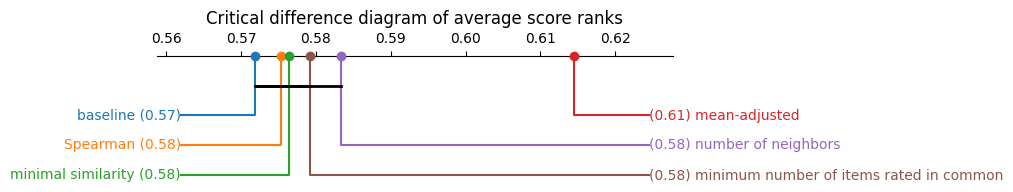

In [83]:
avg_rank = data.groupby('cv_fold').score.rank(pct=True).groupby(data.estimator).mean()

plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, test_results)
plt.tight_layout()
plt.savefig("results/cd_plot.png", dpi=400)